In [357]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calplot
from sklearn.preprocessing import MinMaxScaler


In [358]:
data =  pd.DataFrame(pd.read_csv("CPI(1986-2024).csv", encoding= 'unicode_escape'))
data = data.dropna() 
print(data.shape)
#renaming the columns
data = data.rename(columns=data.loc[8])
data = data.drop(8)

#indexing the date
data['Date'] = pd.to_datetime(data.iloc[:, 0], format="%b-%y", errors='coerce')
data = data.set_index('Date')

data = data.drop('Products and product groups 3 4', axis=1)
data
#convert to numeric
for i in range(len(data.columns)):
    data[data.columns[i]]=pd.to_numeric(data[data.columns[i]])

# print(data.head())
bakery_df = pd.DataFrame(data['Bakery and cereal products (excluding baby food)'])
scaler = MinMaxScaler()
bakery_df_scaled = pd.DataFrame(scaler.fit_transform(bakery_df), columns=bakery_df.columns, index=data.index)
bakery_df_scaled
# bakery_df_log = np.log(bakery_df + 1e-9)
# bakery_df_log

(458, 10)


,Bakery and cereal products (excluding baby food)
Date,
1986-04-01,0.001560
1986-05-01,0.000780
1986-06-01,0.000000
1986-07-01,0.004680
1986-08-01,0.006240
...,...
2023-12-01,0.989080
2024-01-01,0.982059
2024-02-01,0.987520


In [359]:
### BAKERY
num_lags = 24
lagged_dfs = []

#shifting process
for i in range(1, num_lags + 1):
    lagged_df = bakery_df_scaled.shift(-i)
    lagged_df.columns = [f'Bakery_lag{i}' for col in lagged_df.columns]  
    lagged_dfs.append(lagged_df)
    
# Concatenate all lagged DataFrames into a single DataFrame
lagged_df = pd.concat(lagged_dfs, axis=1)
lagged_df
# plt.figure(figsize=(10, 6))
# plt.plot(bakery_df_scaled, label='Original A')
# plt.plot(lagged_df, label='Lagged A (lag=1)')
# plt.legend()
# plt.title('Original and Lagged Series')
# plt.show()

,Bakery_lag1,Bakery_lag2,Bakery_lag3,Bakery_lag4,Bakery_lag5,Bakery_lag6,Bakery_lag7,Bakery_lag8,Bakery_lag9,Bakery_lag10,...,Bakery_lag15,Bakery_lag16,Bakery_lag17,Bakery_lag18,Bakery_lag19,Bakery_lag20,Bakery_lag21,Bakery_lag22,Bakery_lag23,Bakery_lag24
Date,,,,,,,,,,,,,,,,,,,,,
1986-04-01,0.000780,0.000000,0.004680,0.006240,0.00468,0.00000,0.003900,0.008580,0.011700,0.009360,...,0.020281,0.019501,0.017161,0.015601,0.019501,0.020281,0.025741,0.024961,0.027301,0.029641
1986-05-01,0.000000,0.004680,0.006240,0.004680,0.00000,0.00390,0.008580,0.011700,0.009360,0.013261,...,0.019501,0.017161,0.015601,0.019501,0.020281,0.025741,0.024961,0.027301,0.029641,0.029641
1986-06-01,0.004680,0.006240,0.004680,0.000000,0.00390,0.00858,0.011700,0.009360,0.013261,0.011700,...,0.017161,0.015601,0.019501,0.020281,0.025741,0.024961,0.027301,0.029641,0.029641,0.037441
1986-07-01,0.006240,0.004680,0.000000,0.003900,0.00858,0.01170,0.009360,0.013261,0.011700,0.016381,...,0.015601,0.019501,0.020281,0.025741,0.024961,0.027301,0.029641,0.029641,0.037441,0.037441
1986-08-01,0.004680,0.000000,0.003900,0.008580,0.01170,0.00936,0.013261,0.011700,0.016381,0.011700,...,0.019501,0.020281,0.025741,0.024961,0.027301,0.029641,0.029641,0.037441,0.037441,0.040562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,0.982059,0.987520,0.982059,0.982059,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,0.987520,0.982059,0.982059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,0.982059,0.982059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
# Economic Policy Uncertainty Index # from Economic Policy Uncertainty
df = pd.read_csv("Canada_Policy_Uncertainty_Data.csv")
df = df.dropna()
df = df.drop(df.index[0:15])
df = df.drop(df.index[-1])

df["Month"] = df['Month'].astype(int)
df["Date"] = df["Year"].astype(str) + '-' + df["Month"].astype(str) + '-01'
df.drop(['Year', 'Month'], axis='columns', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [361]:
# Geopolitical Risk Index # Caldara and Iacoviello GPR index 
df1 = pd.DataFrame(pd.read_csv("data_gpr_daily_recent.csv"))
# df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)
df1 = df1.drop(["event", 'var_name', 'var_label'], axis=1)
df1 = df1.dropna()
df1[df1.columns[2]]=pd.to_numeric(df1[df1.columns[2]].str.replace(',', ''))
df1[df1.columns[3]]=pd.to_numeric(df1[df1.columns[3]].str.replace(',', ''))

df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index(df1['date'])

df1.drop(['date', 'DAY'], axis='columns', inplace=True)
df1= df1.resample('MS').sum()

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

In [362]:
### Exchange Rate #### from USDA -ERS
#data manipulation
df2 = pd.DataFrame(pd.read_csv("realmonthlycountryexchangerates.csv", encoding= 'unicode_escape'))
df2 = df2[199:657]
df2 = df2.iloc[:,:3]
df2 = df2.dropna()
df2 = df2.rename(columns= {"Monthly real exchange rates (local currency per U.S. dollar)": 'Month', "Unnamed: 1": "Year","Unnamed: 2": "Exchange Rate"})
df2[df2.columns[2]]=pd.to_numeric(df2[df2.columns[2]])

#set index
df2["Date"] = df2["Year"].astype(str) + '-' + df2["Month"].astype(str) + '-01'
df2.drop(['Year', 'Month'], axis='columns', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index(['Date'])

#scale data
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

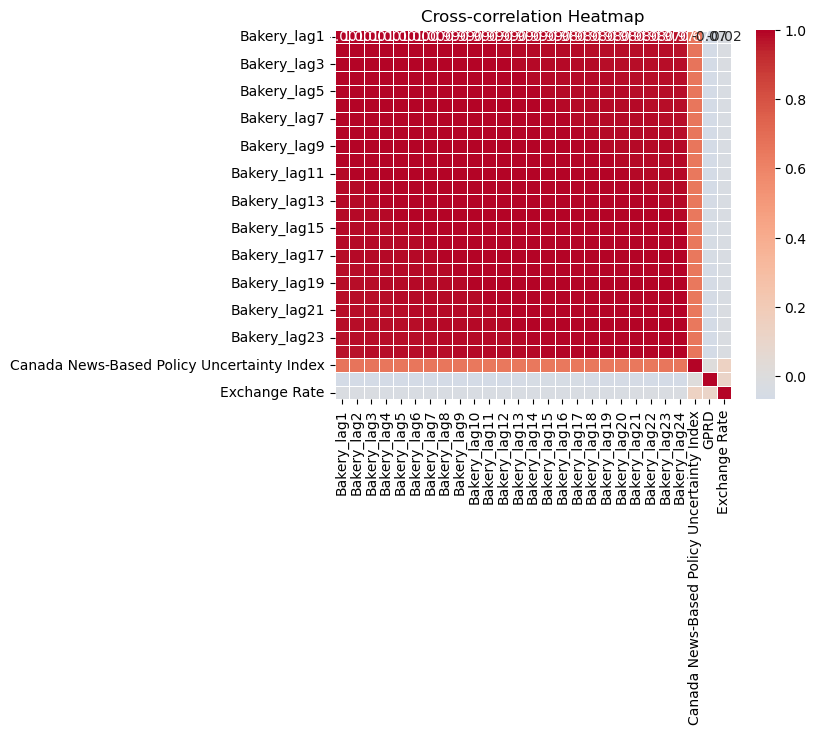

In [363]:
## Cross Correlation

# Concatenate the DataFrames along the columns axis
concatenated_df = pd.concat([df,df1['GPRD'], df2], axis=1)
start = '1986-04-01'
end = '2024-04-01'
date_range = pd.date_range(start=start, end=end, freq='MS')
concatenated_df.index= date_range

# # exogeneous and lagged data
combined_df = pd.concat([lagged_df, concatenated_df], axis=1).dropna()
combined_df
#correlation matrix
corr_matrix = combined_df.corr()
# print(corr_matrix)

# Plot the heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cross-correlation Heatmap')
plt.show()